<a href="https://colab.research.google.com/github/Akshayyyyyyyyyy/PortfolioProject/blob/main/Hospitality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv("/content/hotel_bookings 2.csv")

**Exploratory data analysis and data cleaning**

In [48]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [49]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [52]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [53]:
for col in df.describe(include="object").columns:         #To find unique entries in each column with object as its datatype
  print(col)
  print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [54]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [55]:
df.drop(["company","agent"],axis=1,inplace=True)
df.dropna(inplace=True)

In [56]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [57]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

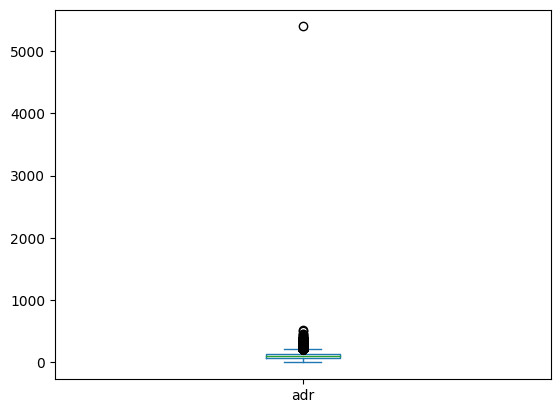

In [58]:
df['adr'].plot(kind="box")
#ADR column contains values ranging from -6 to 5400 and majority data lies in less than 500

In [59]:
df=df[df["adr"]<5000]

<Axes: >

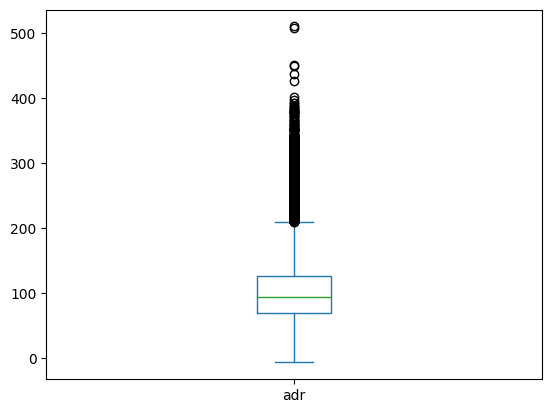

In [60]:
df['adr'].plot(kind="box")

**Data analysis and Visualization**

In [61]:
#Considering important columns

In [62]:
cancelled_pers=df["is_canceled"].value_counts(normalize=True)      #0 is No and 1 is Yes
cancelled_pers

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

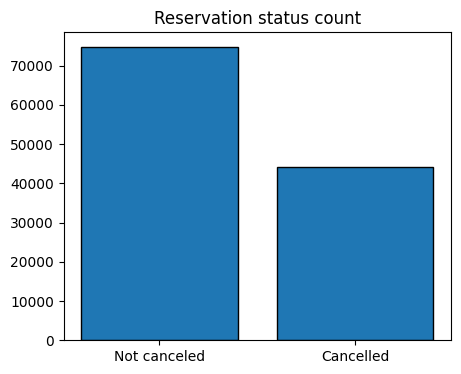

In [63]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not canceled","Cancelled"],df["is_canceled"].value_counts(), edgecolor="k",width=0.8)
plt.show()

#More than half of the entries have cancelled the booking

In [64]:
#Find out which hotel has more number of cancellations

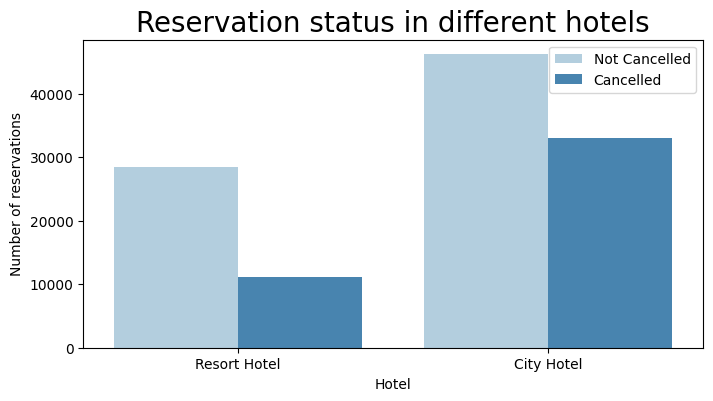

In [65]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Blues")
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1,1))
plt.title("Reservation status in different hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of reservations")
plt.show()

In [66]:
#To find which particular hotel has more number of cancellations

resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [67]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [68]:
#Cancellation rates of resort hotel is 27% and for city hotel its 41%

**ADR**=**Average** **Daily** **Rate**

In [122]:
df['adr'].mean()

101.9586829777034

In [69]:
#Considering pricing of each category

#Used ai tools for below 2 codes

# Check if 'adr' column exists in the DataFrame
if isinstance(resort_hotel, pd.DataFrame) and 'adr' in resort_hotel.columns:
    # Group by 'reservation_status_date' and calculate the mean of 'adr'
    resort_hotel = resort_hotel.groupby("reservation_status_date")['adr'].mean().reset_index()

# Repeat the same for city_hotel if needed

if isinstance(city_hotel, pd.DataFrame) and 'adr' in city_hotel.columns:
    # Group by 'reservation_status_date' and calculate the mean of 'adr'
    city_hotel = city_hotel.groupby("reservation_status_date")['adr'].mean().reset_index()

In [79]:
# Print the data type of the Series
print(resort_hotel.dtypes)

# Assuming 'reservation_status_date' is not present in the column names, print the first few elements of the Series
print(resort_hotel.head())

# Now, let's try to identify the correct datetime column and convert it
# If 'reservation_status_date' is not the correct column name, replace it with the correct one

# Print the data type of the potential datetime column
print(resort_hotel.index.dtype)

# Try to convert the index to datetime
resort_hotel.index = pd.to_datetime(resort_hotel.index, errors='coerce')

# Print the data type again
print(resort_hotel.index.dtype)


reservation_status_date    datetime64[ns]
adr                               float64
dtype: object
                              reservation_status_date         adr
1970-01-01 00:00:00.000000000              2014-11-18    0.000000
1970-01-01 00:00:00.000000001              2015-01-01   61.966667
1970-01-01 00:00:00.000000002              2015-01-05  115.363333
1970-01-01 00:00:00.000000003              2015-01-06  133.677143
1970-01-01 00:00:00.000000004              2015-01-07   82.485455
datetime64[ns]
datetime64[ns]


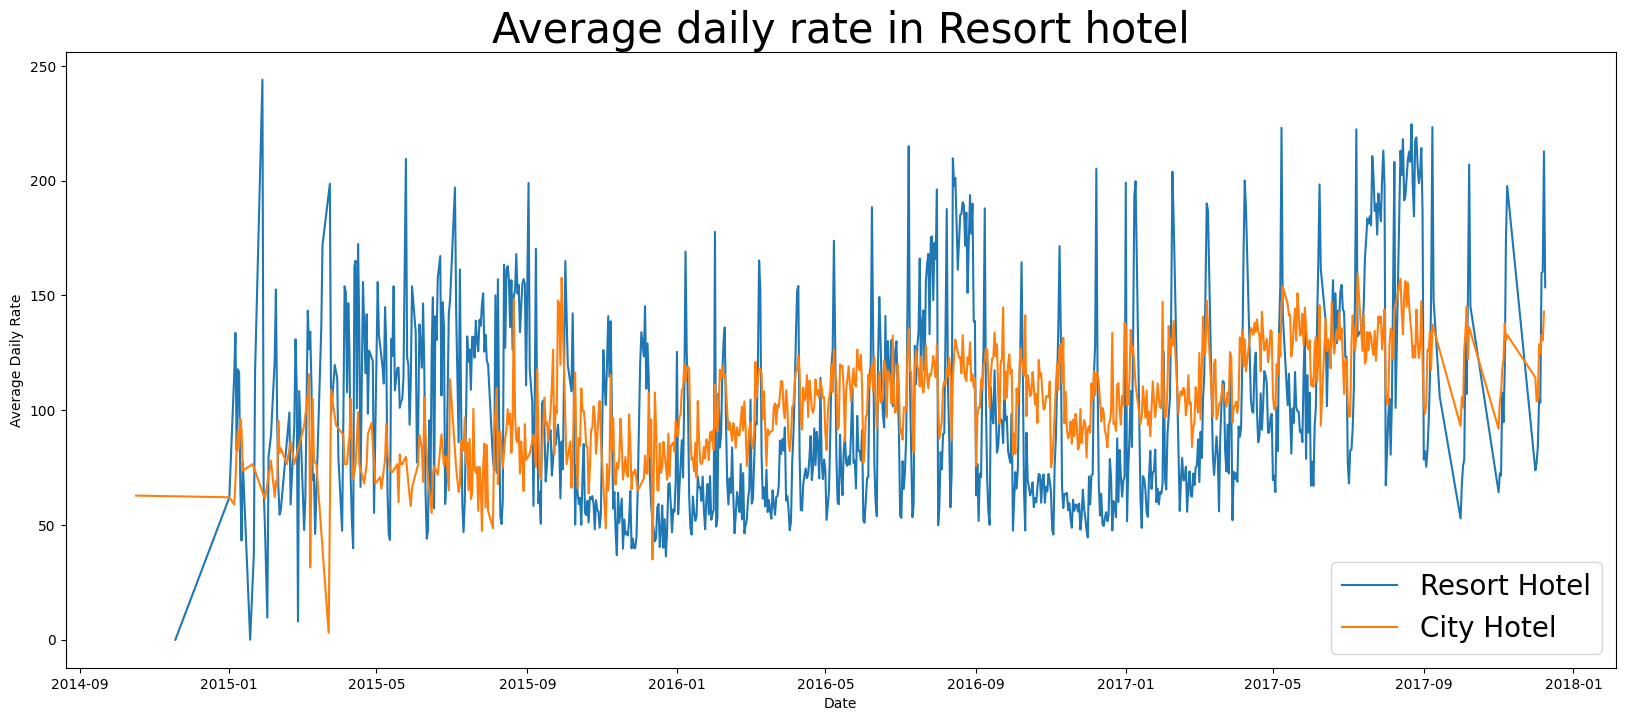

In [93]:
plt.figure(figsize=(20, 8))
plt.title("Average daily rate in Resort hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label="City Hotel")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate")
plt.legend(fontsize=20)
plt.show()


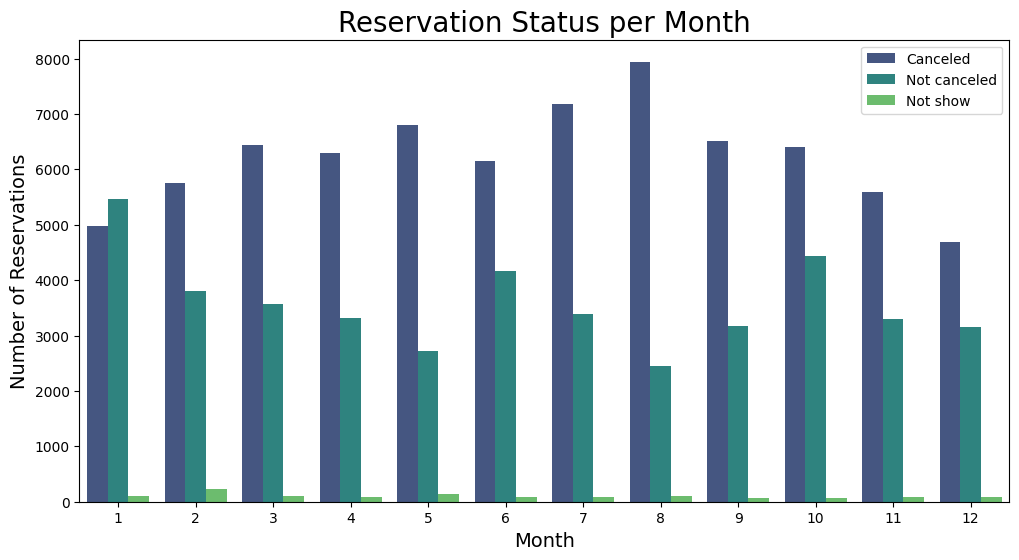

In [94]:
#Considering last two columns of reservation status and reservation status date

#Extracting month from the column
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='reservation_status', data=df, palette='viridis')
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.legend(["Canceled", "Not canceled","Not show"])
plt.show()


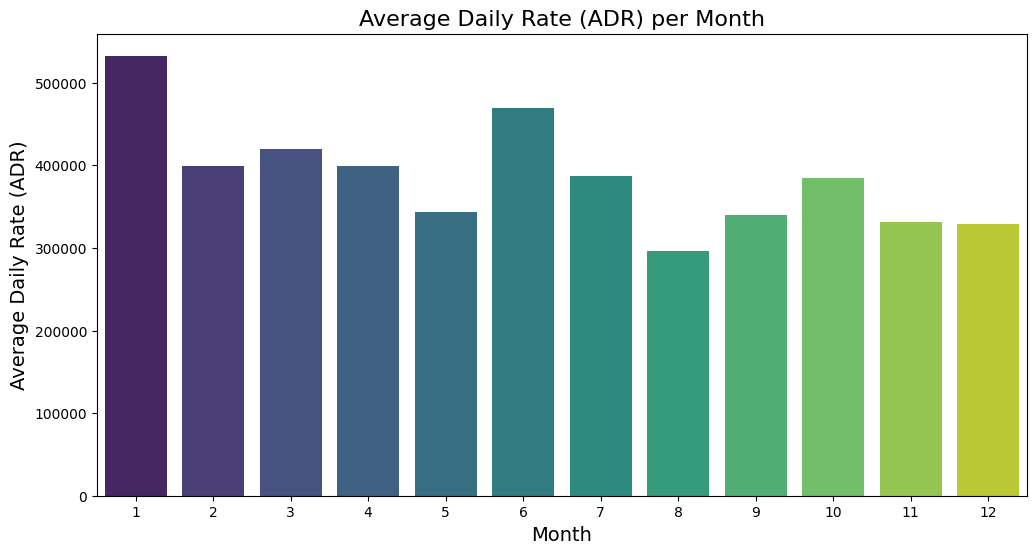

In [95]:
#Calculating ADR for each month
#We are using is_canceled==1 because to find the adr of cancelled bookings and hence it will help in understanding of pricing and reason behind cancellation during this period
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='adr', data=df[df["is_canceled"]==1].groupby('month')[["adr"]].sum().reset_index(), palette='viridis', ci=None)  # ci=None removes error bars
plt.title('Average Daily Rate (ADR) per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.show()

#Below graphs conveys that when prices are higher cancellation rates are also higher

In [98]:
#Considering country column to find more number of cancellations country wise

In [104]:
cancelled_data=df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]

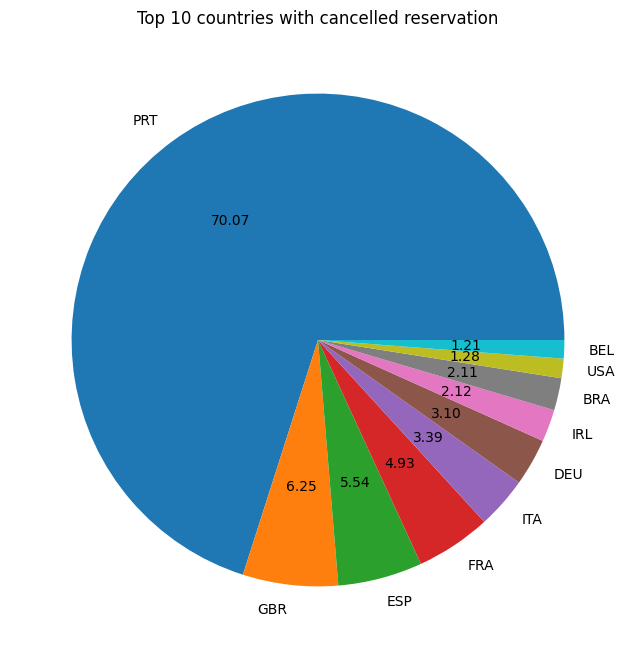

In [105]:
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with cancelled reservation")
plt.pie(top_10_country, autopct="%.2f", labels=top_10_country.index)
plt.show()

In [109]:
#Considering market segment from which customers are obtained

df.market_segment.value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [110]:
df.market_segment.value_counts(normalize=True)
#Total percentage from both confirmed and cancelled bookings

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [112]:
#Total percentage from only cancelled bookings

cancelled_data["market_segment"].value_counts(normalize=True)


Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [116]:
#Considering deposit type column

df["deposit_type"].value_counts()

No Deposit    104163
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

In [117]:
df["deposit_type"].groupby(df["is_canceled"]).value_counts()

is_canceled  deposit_type
0            No Deposit      74526
             Refundable        126
             Non Refund         93
1            No Deposit      29637
             Non Refund      14479
             Refundable         36
Name: deposit_type, dtype: int64

Based on above findings we can understand that customers are cancelling the booking where there is "No deposit" option with over 29637 reservation and its better if hotels changed its type to refundable

In [ ]:
#Based on customer type

<Axes: >

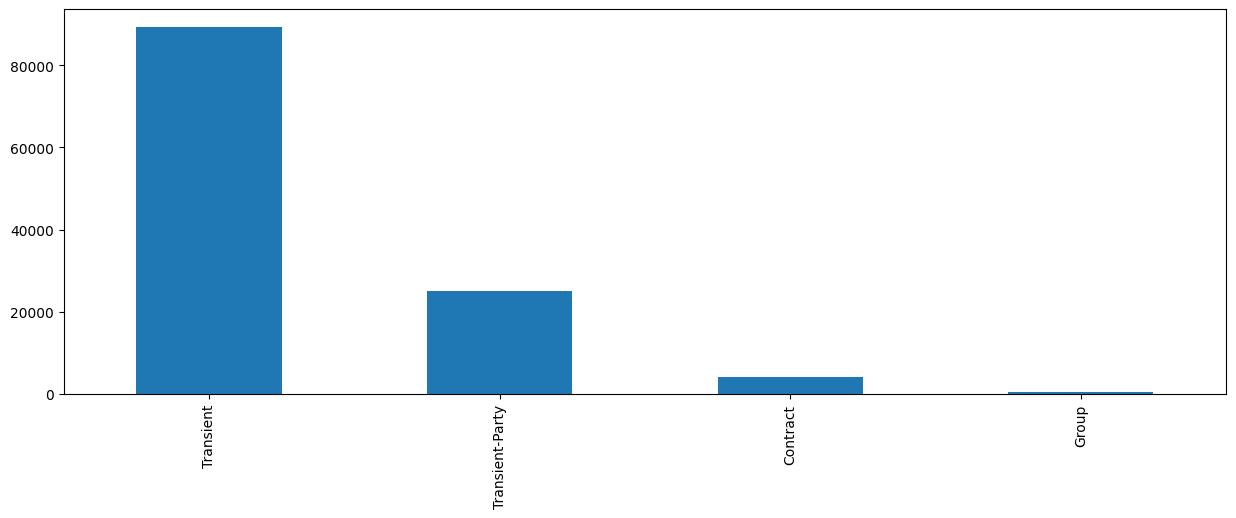

In [119]:
df["customer_type"].value_counts().plot(kind="bar", figsize=(15,5))

In [ ]:
#Considering meal type

In [120]:
df.meal.value_counts()

BB           91862
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

<Axes: >

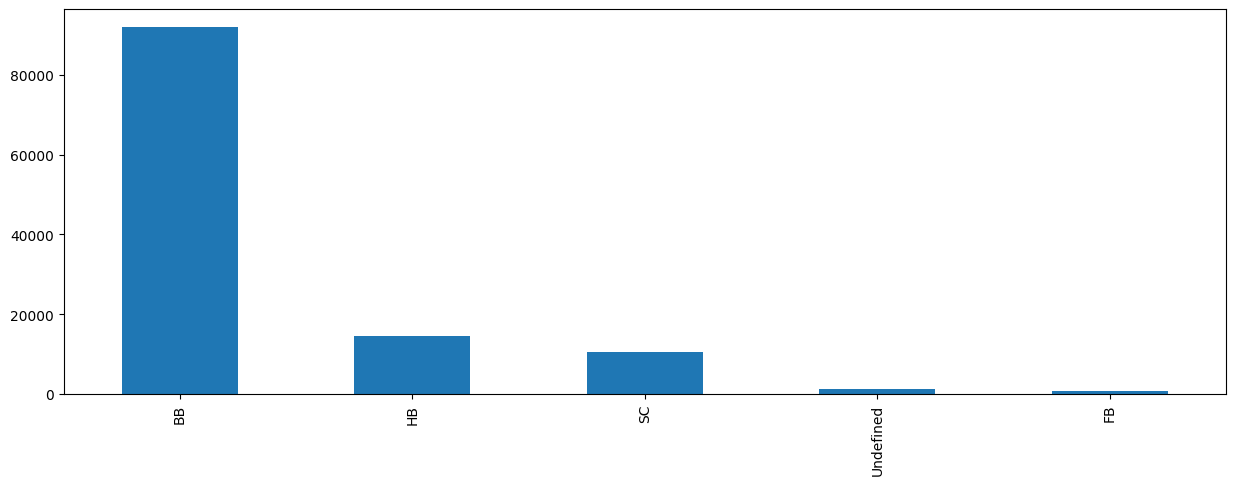

In [121]:
df["meal"].value_counts().plot(kind="bar", figsize=(15,5))